In [1]:
import pandas as pd
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Mapas:
#import geopandas as gpd
#import folium
#from folium import plugins
#from folium.plugins import MarkerCluster
#from shapely.geometry import Point

In [2]:
df = pd.read_csv('./Motor_Vehicle_Collisions_Crashes.csv')
df

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_9918/2823255202.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Motor_Vehicle_Collisions_Crashes.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124933,08/20/2024,15:18,BROOKLYN,11212.0,NaN,NaN,NaN,NaN,NaN,44 NEW LOTS AVENUE,...,Unspecified,NaN,NaN,NaN,4750415,Sedan,Box Truck,NaN,NaN,NaN
2124934,08/21/2024,8:50,BRONX,10475.0,NaN,NaN,NaN,NaN,NaN,2035 BARTOW AVENUE,...,Unspecified,NaN,NaN,NaN,4750338,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2124935,08/21/2024,20:10,QUEENS,11103.0,NaN,NaN,NaN,BROADWAY,NEWTOWN ROAD,NaN,...,Unspecified,NaN,NaN,NaN,4750194,Station Wagon/Sport Utility Vehicle,Moped,NaN,NaN,NaN
2124936,08/21/2024,12:58,BRONX,10462.0,NaN,NaN,NaN,WHITE PLAINS ROAD,WOOD AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4750059,Bike,Sedan,NaN,NaN,NaN


## LIMPIEZA DE LOS DATOS
Removemos los NaN de los datos para que no se propaguen y no causen problemas futuros 

In [4]:
df = df.fillna('0')
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,0,0,0,0,0,WHITESTONE EXPRESSWAY,20 AVENUE,0,...,Unspecified,0,0,0,4455765,Sedan,Sedan,0,0,0
1,03/26/2022,11:45,0,0,0,0,0,QUEENSBORO BRIDGE UPPER,0,0,...,0,0,0,0,4513547,Sedan,0,0,0,0
2,06/29/2022,6:55,0,0,0,0,0,THROGS NECK BRIDGE,0,0,...,Unspecified,0,0,0,4541903,Sedan,Pick-up Truck,0,0,0
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,0,4456314,Sedan,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,0,0,0,0,4486609,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124933,08/20/2024,15:18,BROOKLYN,11212.0,0,0,0,0,0,44 NEW LOTS AVENUE,...,Unspecified,0,0,0,4750415,Sedan,Box Truck,0,0,0
2124934,08/21/2024,8:50,BRONX,10475.0,0,0,0,0,0,2035 BARTOW AVENUE,...,Unspecified,0,0,0,4750338,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
2124935,08/21/2024,20:10,QUEENS,11103.0,0,0,0,BROADWAY,NEWTOWN ROAD,0,...,Unspecified,0,0,0,4750194,Station Wagon/Sport Utility Vehicle,Moped,0,0,0
2124936,08/21/2024,12:58,BRONX,10462.0,0,0,0,WHITE PLAINS ROAD,WOOD AVENUE,0,...,Unspecified,0,0,0,4750059,Bike,Sedan,0,0,0


In [5]:
df.shape

(2124938, 29)

In [6]:
df_zero_mask = df == 0

In [7]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis = 1)

In [8]:
sum(feature_zero_mask)

0

In [9]:
df_clean1 = df.loc[~feature_zero_mask, :].copy()
df_clean1.shape

(2124938, 29)

In [10]:
df_clean1['COLLISION_ID'].nunique()

2124938

In [11]:
#Los datos ya estaban sanitizados

In [12]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124938 entries, 0 to 2124937
Data columns (total 29 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   CRASH DATE                     object
 1   CRASH TIME                     object
 2   BOROUGH                        object
 3   ZIP CODE                       object
 4   LATITUDE                       object
 5   LONGITUDE                      object
 6   LOCATION                       object
 7   ON STREET NAME                 object
 8   CROSS STREET NAME              object
 9   OFF STREET NAME                object
 10  NUMBER OF PERSONS INJURED      object
 11  NUMBER OF PERSONS KILLED       object
 12  NUMBER OF PEDESTRIANS INJURED  int64 
 13  NUMBER OF PEDESTRIANS KILLED   int64 
 14  NUMBER OF CYCLIST INJURED      int64 
 15  NUMBER OF CYCLIST KILLED       int64 
 16  NUMBER OF MOTORIST INJURED     int64 
 17  NUMBER OF MOTORIST KILLED      int64 
 18  CONTRIBUTING FACTOR VEHICLE

In [13]:
df_clean1['BOROUGH'].value_counts()

BOROUGH
0                660864
BROOKLYN         466735
QUEENS           392695
MANHATTAN        326538
BRONX            216724
STATEN ISLAND     61382
Name: count, dtype: int64

In [14]:
valid_Borough_mask = df_clean1['BOROUGH'] != '0'

In [15]:
valid_Borough_mask[0:5]

0    False
1    False
2    False
3     True
4     True
Name: BOROUGH, dtype: bool

In [16]:
sum(valid_Borough_mask)

1464074

In [17]:
df_clean2 = df_clean1.loc[valid_Borough_mask, :].copy()

In [18]:
df_clean2.shape

(1464074, 29)

In [19]:
df_clean2['BOROUGH'].value_counts()

BOROUGH
BROOKLYN         466735
QUEENS           392695
MANHATTAN        326538
BRONX            216724
STATEN ISLAND     61382
Name: count, dtype: int64

In [20]:
df_clean2

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,0,4456314,Sedan,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,0,0,0,0,4486609,0,0,0,0,0
7,12/14/2021,8:17,BRONX,10475.0,40.86816,-73.83148,"(40.86816, -73.83148)",0,0,344 BAYCHESTER AVENUE,...,Unspecified,0,0,0,4486660,Sedan,Sedan,0,0,0
8,12/14/2021,21:10,BROOKLYN,11207.0,40.67172,-73.8971,"(40.67172, -73.8971)",0,0,2047 PITKIN AVENUE,...,Unspecified,0,0,0,4487074,Sedan,0,0,0,0
9,12/14/2021,14:58,MANHATTAN,10017.0,40.75144,-73.97397,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,0,...,Unspecified,0,0,0,4486519,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124933,08/20/2024,15:18,BROOKLYN,11212.0,0,0,0,0,0,44 NEW LOTS AVENUE,...,Unspecified,0,0,0,4750415,Sedan,Box Truck,0,0,0
2124934,08/21/2024,8:50,BRONX,10475.0,0,0,0,0,0,2035 BARTOW AVENUE,...,Unspecified,0,0,0,4750338,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
2124935,08/21/2024,20:10,QUEENS,11103.0,0,0,0,BROADWAY,NEWTOWN ROAD,0,...,Unspecified,0,0,0,4750194,Station Wagon/Sport Utility Vehicle,Moped,0,0,0
2124936,08/21/2024,12:58,BRONX,10462.0,0,0,0,WHITE PLAINS ROAD,WOOD AVENUE,0,...,Unspecified,0,0,0,4750059,Bike,Sedan,0,0,0


In [21]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

CONTRIBUTING FACTOR VEHICLE 5
0                                              1457879
Unspecified                                       6012
Other Vehicular                                    116
Driver Inattention/Distraction                      14
Pavement Slippery                                   12
Alcohol Involvement                                  7
Driver Inexperience                                  5
Following Too Closely                                4
Traffic Control Disregarded                          3
Fell Asleep                                          3
Drugs (illegal)                                      2
Reaction to Uninvolved Vehicle                       2
Failure to Yield Right-of-Way                        2
Obstruction/Debris                                   2
Passing or Lane Usage Improper                       1
Aggressive Driving/Road Rage                         1
Passing Too Closely                                  1
Fatigued/Drowsy                    

In [22]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 1'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_3018/1959031393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['CONTRIBUTING FACTOR VEHICLE 1'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)


CONTRIBUTING FACTOR VEHICLE 1
Other Vehicular                   594858
Driver Inattention/Distraction    282807
Failure to Yield Right-of-Way      93159
Backing Unsafely                   61453
Following Too Closely              49230
                                   ...  
Shoulders Defective/Improper          54
Windshield Inadequate                 54
Texting                               30
Listening/Using Headphones            15
1                                      8
Name: count, Length: 61, dtype: int64

In [23]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 2'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_3018/712793659.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['CONTRIBUTING FACTOR VEHICLE 2'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)


CONTRIBUTING FACTOR VEHICLE 2
Other Vehicular                     1061126
0                                    242462
Driver Inattention/Distraction        64037
Failure to Yield Right-of-Way         12599
Passing or Lane Usage Improper         7825
                                     ...   
Listening/Using Headphones                9
Windshield Inadequate                     7
Using On Board Navigation Device          6
1                                         3
Texting                                   2
Name: count, Length: 61, dtype: int64

In [24]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 3'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_3018/2095936823.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['CONTRIBUTING FACTOR VEHICLE 3'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)


CONTRIBUTING FACTOR VEHICLE 3
0                                                        1372544
Other Vehicular                                            89071
Driver Inattention/Distraction                               738
Following Too Closely                                        335
Fatigued/Drowsy                                              245
Pavement Slippery                                            141
Driver Inexperience                                           92
Traffic Control Disregarded                                   81
Failure to Yield Right-of-Way                                 80
Passing or Lane Usage Improper                                72
Alcohol Involvement                                           72
Backing Unsafely                                              61
Unsafe Speed                                                  56
Fell Asleep                                                   47
Outside Car Distraction                                     

In [25]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 4'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_3018/1814566056.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['CONTRIBUTING FACTOR VEHICLE 4'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)


CONTRIBUTING FACTOR VEHICLE 4
0                                              1442411
Other Vehicular                                  21355
Driver Inattention/Distraction                      77
Pavement Slippery                                   32
Following Too Closely                               31
Fatigued/Drowsy                                     28
Fell Asleep                                         17
Traffic Control Disregarded                         13
Alcohol Involvement                                 12
Driver Inexperience                                 11
Failure to Yield Right-of-Way                       11
Backing Unsafely                                     7
Reaction to Uninvolved Vehicle                       7
Unsafe Speed                                         6
Passing or Lane Usage Improper                       6
Obstruction/Debris                                   6
Aggressive Driving/Road Rage                         5
Brakes Defective                   

In [26]:
df_clean2['CONTRIBUTING FACTOR VEHICLE 5'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)

df_clean2['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_3018/829929424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['CONTRIBUTING FACTOR VEHICLE 5'].replace(to_replace='Unspecified', value = 'Other Vehicular', inplace = True)


CONTRIBUTING FACTOR VEHICLE 5
0                                              1457879
Other Vehicular                                   6128
Driver Inattention/Distraction                      14
Pavement Slippery                                   12
Alcohol Involvement                                  7
Driver Inexperience                                  5
Following Too Closely                                4
Fell Asleep                                          3
Traffic Control Disregarded                          3
Reaction to Uninvolved Vehicle                       2
Drugs (illegal)                                      2
Obstruction/Debris                                   2
Failure to Yield Right-of-Way                        2
Aggressive Driving/Road Rage                         1
Steering Failure                                     1
Traffic Control Device Improper/Non-Working          1
Failure to Keep Right                                1
Backing Unsafely                   

In [27]:
valid_vehicleType1_mask = df_clean2['VEHICLE TYPE CODE 1'] != '0'

In [28]:
sum(valid_vehicleType1_mask)

1453127

In [30]:
df_clean3 = df_clean2.loc[valid_vehicleType1_mask,:].copy()

In [31]:
df_clean3.shape

(1453127, 29)

In [32]:
df_clean3['VEHICLE TYPE CODE 1'].value_counts()

VEHICLE TYPE CODE 1
Sedan                                  387662
PASSENGER VEHICLE                      310357
Station Wagon/Sport Utility Vehicle    301284
SPORT UTILITY / STATION WAGON          134209
Taxi                                    35065
                                        ...  
e com                                       1
MARK                                        1
EMRGN                                       1
COUPE                                       1
FLAT RACK                                   1
Name: count, Length: 1343, dtype: int64

In [33]:
df = df_clean3.loc[valid_vehicleType1_mask,:].copy()

## Cantidad de accidentes por ciudad
procedemos a crear otro dataframe pero ahora con los datos de las ciudades, posteriormente contaremos cuantos registros tiene cada ciudad y finalmente lo graficamos para ver los datos de manera mas clara.

In [118]:
cities = df['BOROUGH']

In [120]:
cities_counts = df['BOROUGH'].value_counts()

In [121]:
citiesTotal= {'Brooklyn': cities_counts.get('BROOKLYN',0),
             'Bronx': cities_counts.get('BRONX',0),
             'Manhattan': cities_counts.get('MANHATTAN',0),
             'Queens': cities_counts.get('QUEENS',0),
             'StatenIsland': cities_counts.get('STATEN ISLAND',0),
             'Not Available': cities_counts.get('0',0
                                               )}

In [124]:
ocurrences = cities.unique()

In [126]:
citiesTotal
citiesTotal_Df = DataFrame.from_dict(citiesTotal, orient = 'index', columns=['Count'])



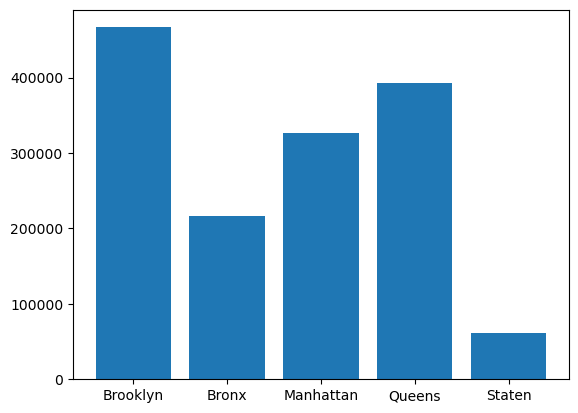

In [128]:
names = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten']
values = [
    citiesTotal_Df.loc['Brooklyn', 'Count'],
    citiesTotal_Df.loc['Bronx', 'Count'],
    citiesTotal_Df.loc['Manhattan', 'Count'],
    citiesTotal_Df.loc['Queens', 'Count'],
    citiesTotal_Df.loc['StatenIsland', 'Count'],
]
plt.bar(names, values)
plt.show()

# Queens
## Numero de accidentes por calle en Queens
Comenzando con la ciudad de Queens, realizaremos un dataframe con los registros en esta ciudad, calcularemos el promedio de accidentes y graficaremos las calles con mayor cantidad de accidentes.

In [131]:
df_queens = df.loc[df['BOROUGH']=='QUEENS']


In [6]:
#codigo para establecer el nombre de la calle en la que ocurrio el accidente
#dado que en el dataset algunas tienen su nombre en 'on street name', 'cross street name' o 'off street name'
#se hara un recorrido por estas 3 y pasara el nombre de la primer calle que encuentre
#'STREET NAME' es una columna nueva que crearemos para guardar el resultado ahi
def nombreCalle(df_):
    calle=[]
    for _,calleS in df_.iterrows():
        if calleS['ON STREET NAME'] != '0':
            calle.append(calleS['ON STREET NAME'])
        elif calleS['CROSS STREET NAME'] != '0':
            calle.append(calleS['CROSS STREET NAME'])
        else:
            calle.append(calleS['OFF STREET NAME'])
    df_['STREET NAME'] = calle
    return df_


In [133]:
df_queens = nombreCalle(df_queens)
df_queens

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_7126/2407126915.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['STREET NAME'] = calle


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,STREET NAME
11,12/14/2021,16:50,QUEENS,11413.0,40.675884,-73.75577,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0,...,0,0,0,4487127,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0,SPRINGFIELD BOULEVARD
14,12/14/2021,23:10,QUEENS,11434.0,40.66684,-73.78941,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,0,...,0,0,0,4486635,Sedan,Sedan,0,0,0,NORTH CONDUIT AVENUE
22,12/13/2021,6:30,QUEENS,11372.0,40.75373,-73.88505,"(40.75373, -73.88505)",82 STREET,34 AVENUE,0,...,0,0,0,4486967,Sedan,0,0,0,0,82 STREET
30,12/12/2021,9:00,QUEENS,11385.0,40.70447,-73.90148,"(40.70447, -73.90148)",0,0,59-14 67 AVENUE,...,0,0,0,4486933,Station Wagon/Sport Utility Vehicle,0,0,0,0,59-14 67 AVENUE
44,04/24/2022,6:00,QUEENS,11411.0,0.0,0.0,"(0.0, 0.0)",0,0,116-44 234 STREET,...,0,0,0,4521460,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0,116-44 234 STREET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124906,08/21/2024,21:45,QUEENS,11418.0,0,0,0,HILLSIDE AVENUE,122 STREET,0,...,0,0,0,4749753,Sedan,Pick-up Truck,0,0,0,HILLSIDE AVENUE
2124907,08/21/2024,11:44,QUEENS,11413.0,0,0,0,0,0,218-24 137 AVENUE,...,0,0,0,4749640,Sedan,0,0,0,0,218-24 137 AVENUE
2124929,08/21/2024,8:30,QUEENS,11423.0,0,0,0,0,0,196-24 90 AVENUE,...,0,0,0,4750520,Sedan,Sedan,0,0,0,196-24 90 AVENUE
2124935,08/21/2024,20:10,QUEENS,11103.0,0,0,0,BROADWAY,NEWTOWN ROAD,0,...,0,0,0,4750194,Station Wagon/Sport Utility Vehicle,Moped,0,0,0,BROADWAY


In [136]:
cont_calles_queens = df_queens['STREET NAME'].value_counts()
cont_calles_queens

STREET NAME
NORTHERN BOULEVARD                          8852
QUEENS BOULEVARD                            6732
WOODHAVEN BOULEVARD                         4368
HILLSIDE AVENUE                             4052
NORTH CONDUIT AVENUE                        3951
                                            ... 
198-28    CARPENTER AVENUE                     1
84-21     57 AVENUE                            1
99-79     164 ROAD                             1
129-42    133 STREET                           1
196-24    90 AVENUE                            1
Name: count, Length: 63925, dtype: int64

In [137]:
promedio_calles_queens = cont_calles_queens.mean()
promedio_calles_queens

6.143058271411811

In [138]:
top_calles_queens = cont_calles_queens.head(12)
top_calles_queens

STREET NAME
NORTHERN BOULEVARD                  8852
QUEENS BOULEVARD                    6732
WOODHAVEN BOULEVARD                 4368
HILLSIDE AVENUE                     4052
NORTH CONDUIT AVENUE                3951
JAMAICA AVENUE                      3499
ROCKAWAY BOULEVARD                  3436
SOUTH CONDUIT AVENUE                3009
FRANCIS LEWIS BOULEVARD             2774
UNION TURNPIKE                      2686
LINDEN BOULEVARD                    2513
ROOSEVELT AVENUE                    2360
Name: count, dtype: int64

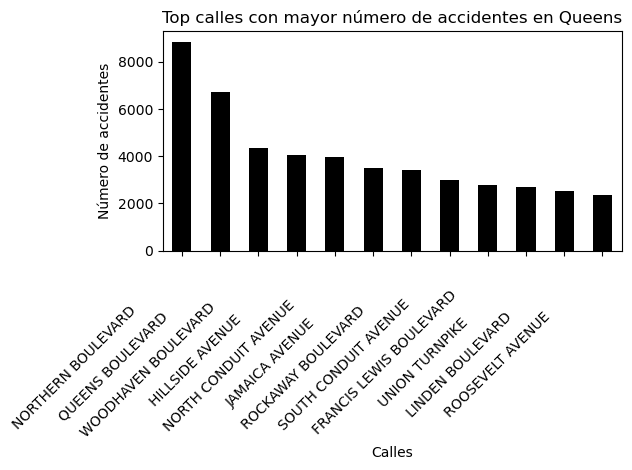

In [139]:
plt.figure()
top_calles_queens.plot(kind='bar', color='black')
plt.title('Top calles con mayor número de accidentes en Queens')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [140]:
top_calles_queens = cont_calles_queens.head(8)
top_calles_queens

STREET NAME
NORTHERN BOULEVARD                  8852
QUEENS BOULEVARD                    6732
WOODHAVEN BOULEVARD                 4368
HILLSIDE AVENUE                     4052
NORTH CONDUIT AVENUE                3951
JAMAICA AVENUE                      3499
ROCKAWAY BOULEVARD                  3436
SOUTH CONDUIT AVENUE                3009
Name: count, dtype: int64

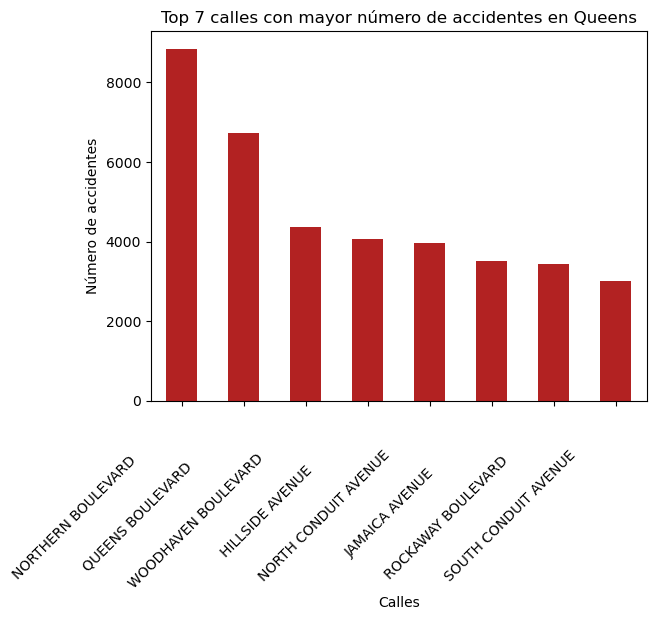

In [141]:
plt.figure()
top_calles_queens.plot(kind='bar', color='firebrick')
plt.title('Top 7 calles con mayor número de accidentes en Queens')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.show()

### Prediccion accidentes en 2025

In [143]:
#Ahora procederemos a realizar una prediccion con las fechas de accidentes, se usara de referencia
#las fechas en el dataset y despues prediciremos las de 2025
df_queens["CRASH DATE"]

11         12/14/2021
14         12/14/2021
22         12/13/2021
30         12/12/2021
44         04/24/2022
              ...    
2124906    08/21/2024
2124907    08/21/2024
2124929    08/21/2024
2124935    08/21/2024
2124937    08/21/2024
Name: CRASH DATE, Length: 392695, dtype: object

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [145]:
df_queensP = df_queens
#obtenemos el año y el mes de CRASH DATE en el dataframe queens
df_queensP['Fecha'] = pd.to_datetime(df_queens["CRASH DATE"])
df_queensP['Año'] = df_queensP['Fecha'].dt.year
df_queensP['Mes'] = df_queensP['Fecha'].dt.month

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_7126/2418512022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_queensP['Fecha'] = pd.to_datetime(df_queens["CRASH DATE"])
/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_7126/2418512022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_queensP['Año'] = df_queensP['Fecha'].dt.year
/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_7126/2418512022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [146]:
df_queensP

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,STREET NAME,Fecha,Año,Mes
11,12/14/2021,16:50,QUEENS,11413.0,40.675884,-73.75577,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0,...,4487127,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0,SPRINGFIELD BOULEVARD,2021-12-14,2021,12
14,12/14/2021,23:10,QUEENS,11434.0,40.66684,-73.78941,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,0,...,4486635,Sedan,Sedan,0,0,0,NORTH CONDUIT AVENUE,2021-12-14,2021,12
22,12/13/2021,6:30,QUEENS,11372.0,40.75373,-73.88505,"(40.75373, -73.88505)",82 STREET,34 AVENUE,0,...,4486967,Sedan,0,0,0,0,82 STREET,2021-12-13,2021,12
30,12/12/2021,9:00,QUEENS,11385.0,40.70447,-73.90148,"(40.70447, -73.90148)",0,0,59-14 67 AVENUE,...,4486933,Station Wagon/Sport Utility Vehicle,0,0,0,0,59-14 67 AVENUE,2021-12-12,2021,12
44,04/24/2022,6:00,QUEENS,11411.0,0.0,0.0,"(0.0, 0.0)",0,0,116-44 234 STREET,...,4521460,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0,116-44 234 STREET,2022-04-24,2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124906,08/21/2024,21:45,QUEENS,11418.0,0,0,0,HILLSIDE AVENUE,122 STREET,0,...,4749753,Sedan,Pick-up Truck,0,0,0,HILLSIDE AVENUE,2024-08-21,2024,8
2124907,08/21/2024,11:44,QUEENS,11413.0,0,0,0,0,0,218-24 137 AVENUE,...,4749640,Sedan,0,0,0,0,218-24 137 AVENUE,2024-08-21,2024,8
2124929,08/21/2024,8:30,QUEENS,11423.0,0,0,0,0,0,196-24 90 AVENUE,...,4750520,Sedan,Sedan,0,0,0,196-24 90 AVENUE,2024-08-21,2024,8
2124935,08/21/2024,20:10,QUEENS,11103.0,0,0,0,BROADWAY,NEWTOWN ROAD,0,...,4750194,Station Wagon/Sport Utility Vehicle,Moped,0,0,0,BROADWAY,2024-08-21,2024,8


In [147]:
#ahora eliminaremos algunas columnas para quedarnos solo las que usaremos en la prediccion
df_queensP = df_queensP[['Año','Mes']]
df_queensP

,Año,Mes
11,2021,12
14,2021,12
22,2021,12
30,2021,12
44,2022,4
...,...,...
2124906,2024,8
2124907,2024,8
2124929,2024,8
2124935,2024,8


In [148]:
#agrupamos los valores para obtener el numero de accidentes por mes de cada año
df_queensP_agg = df_queensP.groupby(['Año', 'Mes']).size().reset_index(name='Accidentes')

In [149]:
df_queensP_agg

,Año,Mes,Accidentes
0,2012,7,3204
1,2012,8,3150
2,2012,9,3152
3,2012,10,3174
4,2012,11,3186
...,...,...,...
143,2024,6,1516
144,2024,7,1403
145,2024,8,1501
146,2024,9,1415


In [150]:
#dividimos los datos en pistas (X) y el objetivo (y)
#en este caso, la variable objetivo sera cantidad de accidentes.
X = df_queensP_agg[['Año','Mes']]
y = df_queensP_agg['Accidentes']

In [151]:
X

,Año,Mes
0,2012,7
1,2012,8
2,2012,9
3,2012,10
4,2012,11
...,...,...
143,2024,6
144,2024,7
145,2024,8
146,2024,9


In [152]:
y

0      3204
1      3150
2      3152
3      3174
4      3186
       ... 
143    1516
144    1403
145    1501
146    1415
147     173
Name: Accidentes, Length: 148, dtype: int64

In [153]:
#ahora especificamos los conjuntos de entrenamiento y prueba, siendo 80% de entrenamiento y 20% de prueba
#ademas de especificar la semilla que sea 22 para obtener siempre los mismo resultados (no sea diferente cada vez que se ejecute)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [154]:
#le pasamos los datos al modelo de regresión lineal
mod_prediccion_queens = LinearRegression()
mod_prediccion_queens.fit(X_train, y_train)

LinearRegression()

In [155]:
#verificamos que tan viable son las predicciones del modelo con la parte de prueba
punt_mod_queens = mod_prediccion_queens.score(X_test, y_test)
punt_mod_queens

0.7036410274721325

In [156]:
#ahora intentaremos predecir para 2025
import numpy as np
queens_meses_2025 = np.arange(1, 13)  #rango por los 12 meses
queens_pred = pd.DataFrame({'Año': [2025] * 12, 'Mes': queens_meses_2025})

#realizamos la prediccion de accidentes
queens_pred['Accidentes'] = mod_prediccion_queens.predict(queens_pred)
queens_pred

,Año,Mes,Accidentes
0,2025,1,1201.772761
1,2025,2,1204.081152
2,2025,3,1206.389543
3,2025,4,1208.697934
4,2025,5,1211.006324
5,2025,6,1213.314715
6,2025,7,1215.623106
7,2025,8,1217.931497
8,2025,9,1220.239888
9,2025,10,1222.548278


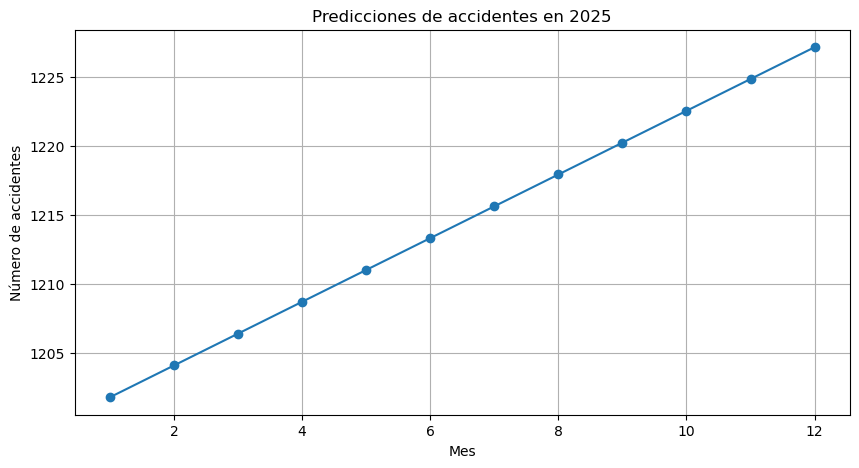

In [157]:
plt.figure(figsize=(10, 5))
plt.plot(queens_pred['Mes'], queens_pred['Accidentes'], marker='o')
plt.title('Predicciones de accidentes en 2025')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.grid(True)
plt.show()

In [158]:
#creamos otro dataframe ahora con los datos de 2023 y 2024 para comparar en la grafica con 2025
df_queensP_agg_2023 = df_queensP_agg.query("Año == 2023")
df_queensP_agg_2024 = df_queensP_agg.query("Año == 2024")

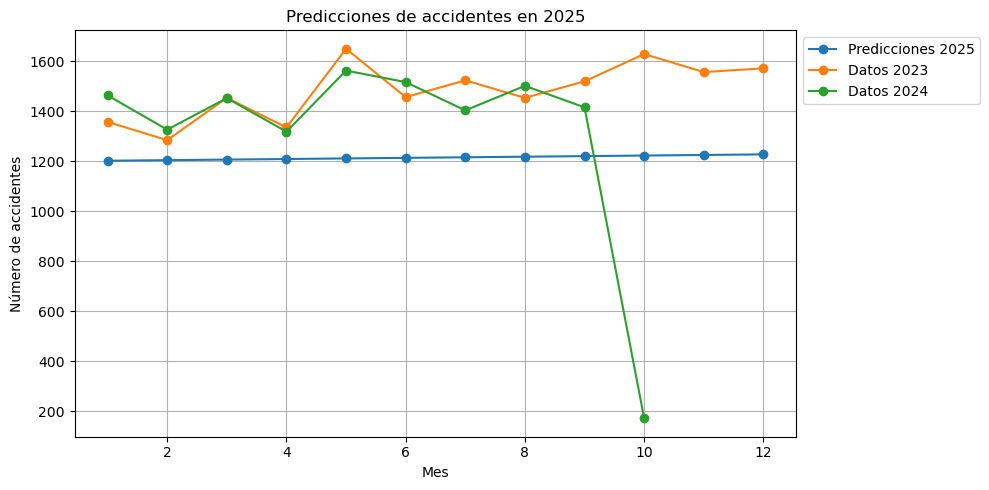

In [189]:
plt.figure(figsize=(10, 5))
plt.plot(queens_pred['Mes'], queens_pred['Accidentes'], marker='o', label="Predicciones 2025")
plt.plot(df_queensP_agg_2023['Mes'], df_queensP_agg_2023['Accidentes'], marker='o', label="Datos 2023")
plt.plot(df_queensP_agg_2024['Mes'], df_queensP_agg_2024['Accidentes'], marker='o', label="Datos 2024")
plt.title('Predicciones de accidentes en 2025')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) 
plt.tight_layout()
plt.show()


Como se puede observar aqui el error fue no poner un rango hasta el mes de septiembre porque el dataset contiene informacion hasta octubre de 2024.

## Numero de accidentes por tipo de coche en Queens

In [156]:
cont_coches_queens = df_queens['VEHICLE TYPE CODE 1'].value_counts()
cont_coches_queens

VEHICLE TYPE CODE 1
Sedan                                  109378
Station Wagon/Sport Utility Vehicle     93919
PASSENGER VEHICLE                       89081
SPORT UTILITY / STATION WAGON           38074
4 dr sedan                               7408
                                        ...  
12 Pa                                       1
FRHT                                        1
FED E                                       1
Budge                                       1
FLAT RACK                                   1
Name: count, Length: 537, dtype: int64

In [158]:
top_coches_queens = cont_coches_queens.head(8)
top_coches_queens

VEHICLE TYPE CODE 1
Sedan                                  109378
Station Wagon/Sport Utility Vehicle     93919
PASSENGER VEHICLE                       89081
SPORT UTILITY / STATION WAGON           38074
4 dr sedan                               7408
Pick-up Truck                            6534
UNKNOWN                                  4501
Taxi                                     4056
Name: count, dtype: int64

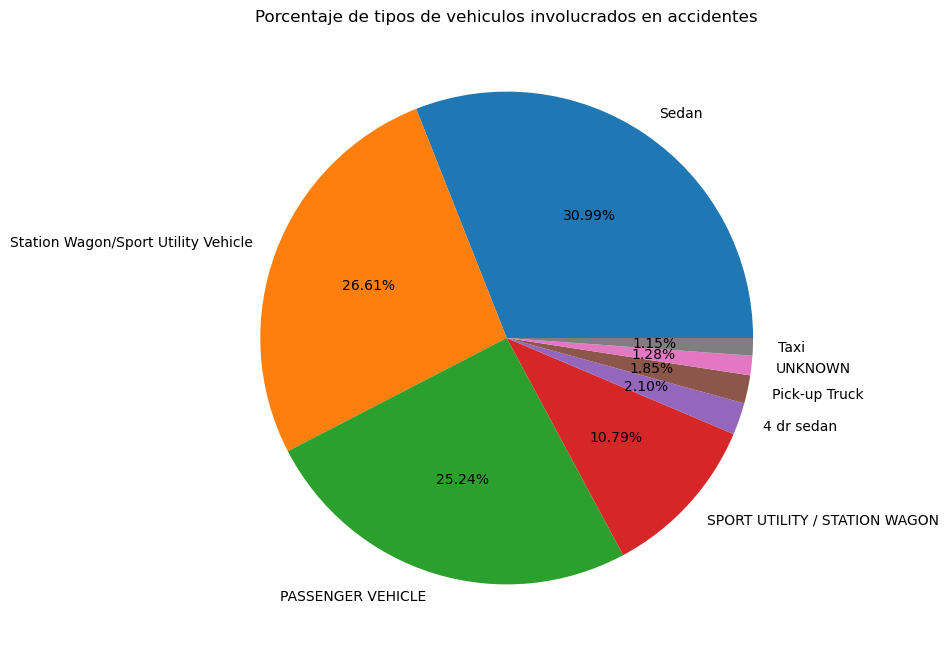

In [160]:
plt.figure(figsize=(8, 8))
plt.pie(top_coches_queens,labels=top_coches_queens.index,autopct='%1.2f%%')
plt.title("Porcentaje de tipos de vehiculos involucrados en accidentes")
plt.show()

# Brooklyn

In [8]:
df_brook = df.loc[df['BOROUGH']=='BROOKLYN']
df_brook = nombreCalle(df_brook)
df_brook

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_9918/2407126915.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['STREET NAME'] = calle


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,STREET NAME
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,4456314,Sedan,0,0,0,0,1211 LORING AVENUE
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,0,0,0,4486609,0,0,0,0,0,SARATOGA AVENUE
8,12/14/2021,21:10,BROOKLYN,11207.0,40.67172,-73.8971,"(40.67172, -73.8971)",0,0,2047 PITKIN AVENUE,...,0,0,0,4487074,Sedan,0,0,0,0,2047 PITKIN AVENUE
15,12/14/2021,17:58,BROOKLYN,11217.0,40.68158,-73.97463,"(40.68158, -73.97463)",0,0,480 DEAN STREET,...,0,0,0,4486604,Tanker,Station Wagon/Sport Utility Vehicle,0,0,0,480 DEAN STREET
16,12/14/2021,20:03,BROOKLYN,11226.0,40.65068,-73.95881,"(40.65068, -73.95881)",0,0,878 FLATBUSH AVENUE,...,0,0,0,4486991,Sedan,0,0,0,0,878 FLATBUSH AVENUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124919,08/23/2024,16:00,BROOKLYN,11232.0,0,0,0,8 AVENUE,41 STREET,0,...,0,0,0,4750149,Sedan,Sedan,0,0,0,8 AVENUE
2124925,08/21/2024,17:28,BROOKLYN,11226.0,0,0,0,0,0,191 EAST 17 STREET,...,0,0,0,4749831,Sedan,0,0,0,0,191 EAST 17 STREET
2124928,08/21/2024,22:30,BROOKLYN,11208.0,0,0,0,LINCOLN AVENUE,MC KINLEY AVENUE,0,...,0,0,0,4750042,Sedan,Sedan,0,0,0,LINCOLN AVENUE
2124931,08/22/2024,0:00,BROOKLYN,11234.0,0,0,0,0,0,1855 EAST 35 STREET,...,Unspecified,Unspecified,Unspecified,4750049,Sedan,Sedan,Sedan,Sedan,Sedan,1855 EAST 35 STREET


In [9]:
cont_calles_brook = df_brook['STREET NAME'].value_counts()
cont_calles_brook

STREET NAME
ATLANTIC AVENUE                             9977
FLATBUSH AVENUE                             6837
LINDEN BOULEVARD                            4867
NOSTRAND AVENUE                             4249
OCEAN PARKWAY                               4144
                                            ... 
1522      GATES AVENUE                         1
675       4 AVENUE                             1
93        GREENPOINT AVENUE                    1
1544      EAST 51 STREET                       1
1855      EAST 35 STREET                       1
Name: count, Length: 80990, dtype: int64

In [10]:
promedio_calles_brook = cont_calles_brook.mean()
promedio_calles_brook

5.762871959501173

In [11]:
top_calles_brook = cont_calles_brook.head(8)
top_calles_brook

STREET NAME
ATLANTIC AVENUE                     9977
FLATBUSH AVENUE                     6837
LINDEN BOULEVARD                    4867
NOSTRAND AVENUE                     4249
OCEAN PARKWAY                       4144
EASTERN PARKWAY                     4120
BEDFORD AVENUE                      4101
UTICA AVENUE                        3854
Name: count, dtype: int64

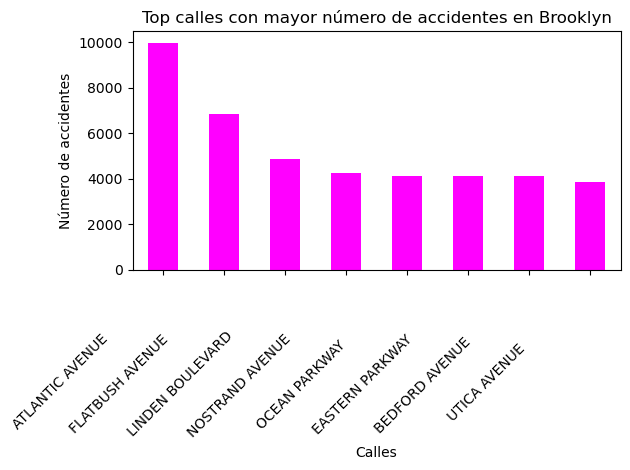

In [12]:
plt.figure()
top_calles_brook.plot(kind='bar', color='magenta')
plt.title('Top calles con mayor número de accidentes en Brooklyn')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
top_calles_brook = cont_calles_brook.head(12)
top_calles_brook

STREET NAME
ATLANTIC AVENUE                     9977
FLATBUSH AVENUE                     6837
LINDEN BOULEVARD                    4867
NOSTRAND AVENUE                     4249
OCEAN PARKWAY                       4144
EASTERN PARKWAY                     4120
BEDFORD AVENUE                      4101
UTICA AVENUE                        3854
KINGS HIGHWAY                       3564
PENNSYLVANIA AVENUE                 3469
CONEY ISLAND AVENUE                 3319
4 AVENUE                            3305
Name: count, dtype: int64

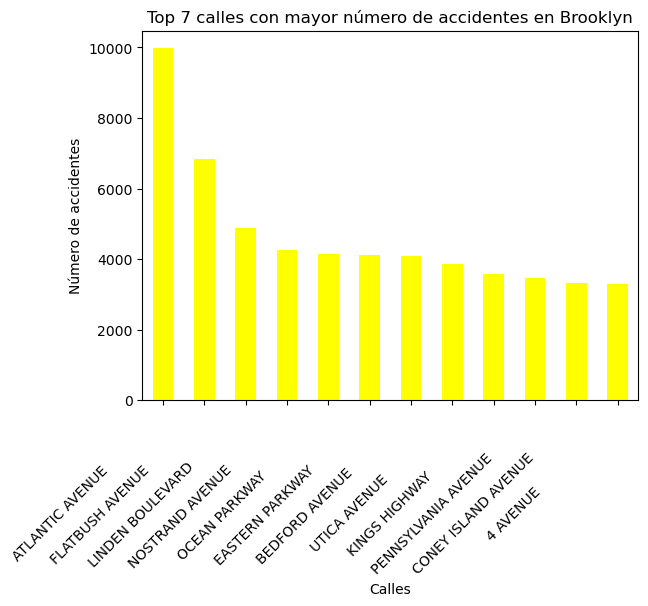

In [14]:
plt.figure()
top_calles_brook.plot(kind='bar', color='yellow')
plt.title('Top 7 calles con mayor número de accidentes en Brooklyn')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Prediccion 2024 Brooklyn

In [18]:
df_brook["CRASH DATE"]

3          09/11/2021
4          12/14/2021
8          12/14/2021
15         12/14/2021
16         12/14/2021
              ...    
2124919    08/23/2024
2124925    08/21/2024
2124928    08/21/2024
2124931    08/22/2024
2124933    08/20/2024
Name: CRASH DATE, Length: 466735, dtype: object

In [19]:
df_brookPred = df_brook
#obtenemos el año y el mes de CRASH DATE en el dataframe
df_brookPred['Fecha'] = pd.to_datetime(df_brook["CRASH DATE"])
df_brookPred['Año'] = df_brookPred['Fecha'].dt.year
df_brookPred['Mes'] = df_brookPred['Fecha'].dt.month

/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_9918/1236769897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brookPred['Fecha'] = pd.to_datetime(df_brook["CRASH DATE"])
/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_9918/1236769897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brookPred['Año'] = df_brookPred['Fecha'].dt.year
/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_9918/1236769897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [20]:
#ahora eliminaremos algunas columnas para quedarnos solo las que usaremos en la prediccion
df_brookPred = df_brookPred[['Año','Mes']]
df_brookPred

,Año,Mes
3,2021,9
4,2021,12
8,2021,12
15,2021,12
16,2021,12
...,...,...
2124919,2024,8
2124925,2024,8
2124928,2024,8
2124931,2024,8


### SPARK
Hacemos uso de spark para la prediccion de 2025

In [22]:
import findspark
findspark.init()

In [23]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import types
import csv

In [24]:
spark=SparkSession.builder.appName("predict_Brooklyn4").config("spark.some.config.option","some-value").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/02 02:58:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [25]:

#hacemos que los datos del año y el mes sean enteros y no string. Esto para poder realizar la prediccion
df_brookPred['Año'] = df_brookPred['Año'].astype(int)
df_brookPred['Mes'] = df_brookPred['Mes'].astype(int)

#hacemos el esquema para spark en base a nuestro dataframe
schema = types.StructType([
    types.StructField("Año", types.IntegerType(), True),
    types.StructField("Mes", types.IntegerType(), True)
])
#y ahora creamos o le pasamos los datos de nuestro dataframe de pandas a spark, ya con los valores en el formato que spark pueda trabajar
df_spark = spark.createDataFrame(df_brookPred, schema=schema)
df_spark.show()



/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_9918/2108505373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brookPred['Año'] = df_brookPred['Año'].astype(int)
/var/folders/f2/nm0g37qj6d7bbfzhp9wv0btm0000gn/T/ipykernel_9918/2108505373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brookPred['Mes'] = df_brookPred['Mes'].astype(int)
24/12/02 02:58:35 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) t

+----+---+
| Año|Mes|
+----+---+
|2021|  9|
|2021| 12|
|2021| 12|
|2021| 12|
|2021| 12|
|2021| 12|
|2021| 12|
|2021| 12|
|2021| 12|
|2022|  7|
|2022|  4|
|2022|  3|
|2022|  4|
|2022|  4|
|2022|  4|
|2021| 12|
|2021| 12|
|2021| 12|
|2021| 12|
|2021| 12|
+----+---+
only showing top 20 rows



In [26]:
#ahora veremos la freciencia sobre las fechas
df_spark = df_spark.groupBy("Año", "Mes").count().withColumnRenamed("count", "Frecuencia")
df_spark.show()

+----+---+----------+
| Año|Mes|Frecuencia|
+----+---+----------+
|2022| 10|      1939|
|2024|  7|      1797|
|2019| 10|      3540|
|2020|  6|      1786|
|2019|  5|      4150|
|2018| 10|      4229|
|2021|  8|      2237|
|2021|  6|      2457|
|2021|  5|      2290|
|2012|  8|      3917|
|2023|  9|      2056|
|2019|  3|      3720|
|2021| 10|      2250|
|2020| 11|      2005|
|2020|  3|      2511|
|2018|  3|      3995|
|2020|  9|      2225|
|2024|  5|      1927|
|2018|  8|      4191|
|2022|  2|      1684|
+----+---+----------+
only showing top 20 rows



In [27]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

#ahora con el uso de VectorAssembler se creara una columna nueva llamada features que contendra un vector: [valores].
#estos valores son los mencionados en inputCols de año y mes
assembler = VectorAssembler(inputCols=["Año", "Mes"], outputCol="features")
df_ml = assembler.transform(df_spark)
#esto es necesario para que df_ml pueda procesarlo


In [28]:
#separamos a los datos de entrenamiento y prueba con 80 y 20
train_data, test_data = df_ml.randomSplit([0.8, 0.2])

In [29]:
#Despues procedemos a crear nuestro modelo de regresion lineal para la prediccion.
#lr es linearRegression
lr = LinearRegression(featuresCol="features", labelCol="Frecuencia")
modelo_brooklyn = lr.fit(train_data)

24/12/02 02:58:52 WARN Instrumentation: [5119536f] regParam is zero, which might cause numerical instability and overfitting.
24/12/02 02:58:52 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/12/02 02:58:52 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/12/02 02:58:53 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [31]:
#se realizan las predicciones de prueba con el modelo
predictions = modelo_brooklyn.transform(test_data)
predictions.select("features", "Frecuencia", "prediction").show()


+-------------+----------+------------------+
|     features|Frecuencia|        prediction|
+-------------+----------+------------------+
| [2012.0,8.0]|      3917|4683.3515975728515|
|[2012.0,11.0]|      3752| 4710.773279779416|
| [2013.0,1.0]|      3656|  4376.19033820997|
| [2013.0,3.0]|      3687| 4394.471459680994|
| [2013.0,7.0]|      3986| 4431.033702623157|
| [2013.0,9.0]|      3809| 4449.314824094181|
| [2014.0,7.0]|      4071| 4187.856368409004|
| [2016.0,1.0]|      4428| 3646.658335567452|
| [2016.0,3.0]|      4124|3664.9394570384757|
| [2016.0,4.0]|      4167|3674.0800177740166|
| [2016.0,5.0]|      4407|3683.2205785095575|
| [2016.0,6.0]|      4069|3692.3611392450985|
| [2016.0,7.0]|      3915|3701.5016999806394|
| [2017.0,1.0]|      3512|3403.4810013532406|
| [2017.0,4.0]|      3497| 3430.902683559805|
| [2017.0,9.0]|      3501|3476.6054872374516|
| [2018.0,6.0]|      4287| 3206.006470816734|
| [2018.0,9.0]|      3842|3233.4281530232984|
| [2019.0,3.0]|      3720|2935.407

In [35]:
df_futuro_2025 = spark.createDataFrame(
    [(2025, 1), (2025, 2), (2025, 3), (2025, 4), (2025, 5), (2025, 6)],
    ["Año", "Mes"]
)

df_futuro_2025 = assembler.transform(df_futuro_2025)
predict_brook_2025 = modelo_brooklyn.transform(df_futuro_2025)
predict_brook_2025.show()


+----+---+------------+------------------+
| Año|Mes|    features|        prediction|
+----+---+------------+------------------+
|2025|  1|[2025.0,1.0]|  1458.06232763984|
|2025|  2|[2025.0,2.0]| 1467.202888375381|
|2025|  3|[2025.0,3.0]|1476.3434491108637|
|2025|  4|[2025.0,4.0]|1485.4840098464047|
|2025|  5|[2025.0,5.0]|1494.6245705819456|
|2025|  6|[2025.0,6.0]|1503.7651313174865|
+----+---+------------+------------------+



In [39]:
#ahora que tenemos las predicciones sobre 2025 procederemos a pasarlas a un dataframe de pandas nuevamente,
#esto para poder graficar los resultados y compararlos con los otros años
df_pandas_brook_2025 = predict_brook_2025.select("Mes", "prediction").toPandas()

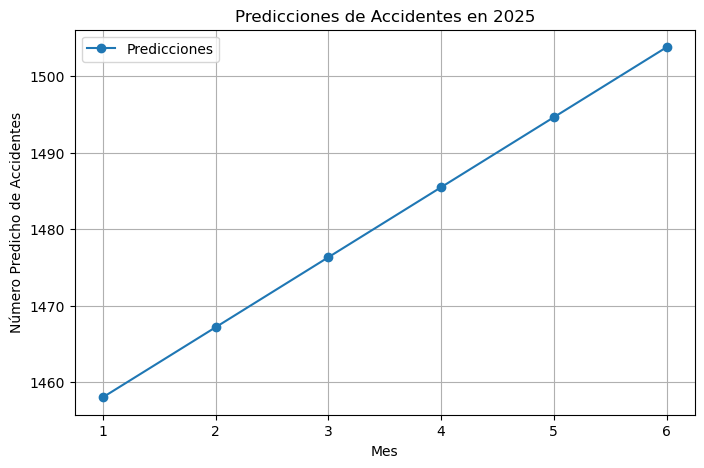

In [43]:
#grafica para 2025
plt.figure(figsize=(8, 5))
plt.plot(df_pandas_brook_2025["Mes"], df_pandas_brook_2025["prediction"], marker='o', label="Predicciones")
plt.title("Predicciones de Accidentes en 2025")
plt.xlabel("Mes")
plt.ylabel("Número Predicho de Accidentes")
plt.xticks(range(1, 7)) 
plt.grid(True)
plt.legend()
plt.show()


In [51]:
df_brook_frecuencia = df_brookPred.groupby(["Año", "Mes"]).size().reset_index(name="Frecuencia")

#agregamos la columns año al df porque antes no la tenia porque no era necesario, pero como ahora compararemos los datos con otros años
#entonces necesitamos distinguirlo
df_pandas_brook_2025["Año"] = 2025
df_pandas_brook_2025 = df_pandas_brook_2025.rename(columns={"prediction": "Frecuencia"})
#filtrar solo los primeros 6 meses porque 2025 solo cuenta del 1er mes hasta el 6to mes
df_brook_frecuencia_6m = df_brook_frecuencia[df_brook_frecuencia["Mes"] <= 6]
df_combinado = pd.concat([df_brook_frecuencia_6m, df_pandas_brook_2025], ignore_index=True)


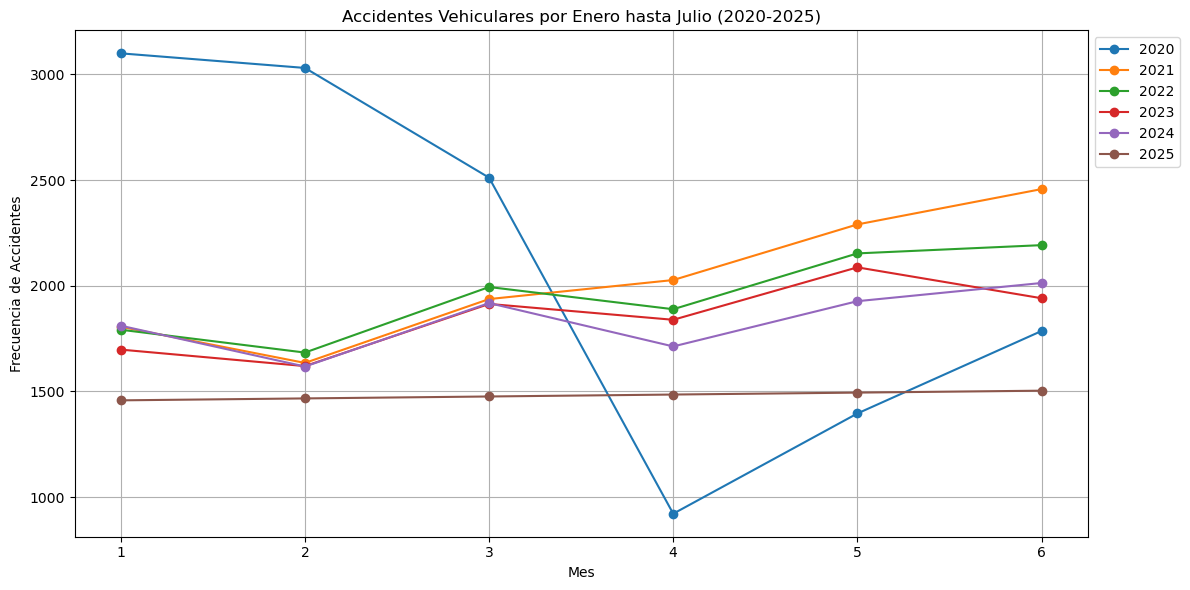

In [53]:
#generamos la grafica donde mostrara el numero de accidentes de 2020 hasta la prediccion 2025 
#cabe recordar que sera sobre los primeros 6 meses.
plt.figure(figsize=(12, 6))
for year in range(2020, 2026):  #años de 2020 a 2025
    datos_anuales = df_combinado[df_combinado["Año"] == year]
    plt.plot(datos_anuales["Mes"], datos_anuales["Frecuencia"], marker='o', label=f"{year}")


plt.title("Accidentes Vehiculares por Enero hasta Julio (2020-2025)")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de Accidentes")
plt.xticks(range(1, 7))  #meses de 1 a 6
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  #leyenda fuera de la grafica
plt.grid(True)
plt.tight_layout()
plt.show()


## Accidentes por coordenadas

In [49]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

In [50]:
dataCoord = df[(df['LATITUDE'] != 0)&(df['LONGITUDE'] != 0)]
dataCoord

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,0,4456314,Sedan,0,0,0,0
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",0,0,344 BAYCHESTER AVENUE,...,Other Vehicular,0,0,0,4486660,Sedan,Sedan,0,0,0
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",0,0,2047 PITKIN AVENUE,...,Other Vehicular,0,0,0,4487074,Sedan,0,0,0,0
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,0,...,Other Vehicular,0,0,0,4486519,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
11,12/14/2021,16:50,QUEENS,11413.0,40.675884,-73.755770,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0,...,Other Vehicular,0,0,0,4487127,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124470,07/10/2024,18:34,BRONX,10454.0,40.812263,-73.920590,"(40.812263, -73.92059)",WILLIS AVENUE,EAST 143 STREET,0,...,0,0,0,0,4746499,Taxi,0,0,0,0
2124502,07/19/2024,18:00,BROOKLYN,11207.0,40.675735,-73.896860,"(40.675735, -73.89686)",ATLANTIC AVENUE,PENNSYLVANIA AVENUE,0,...,Other Vehicular,0,0,0,4746359,Sedan,Sedan,0,0,0
2124566,07/07/2024,14:12,BRONX,10468.0,40.861084,-73.911490,"(40.861084, -73.91149)",0,0,2258 HAMPDEN PLACE,...,0,0,0,0,4746320,Sedan,0,0,0,0
2124604,07/21/2024,18:05,BROOKLYN,11224.0,40.572968,-74.000595,"(40.572968, -74.000595)",0,0,3514 SURF AVENUE,...,Other Vehicular,0,0,0,4746425,Station Wagon/Sport Utility Vehicle,Pick-up Truck,0,0,0


In [51]:
geometry = [Point(xy) for xy in zip(dataCoord['LATITUDE'], dataCoord['LONGITUDE'])]

In [52]:
collisions = gpd.GeoDataFrame(dataCoord, geometry=geometry, crs='EPSG:4326')

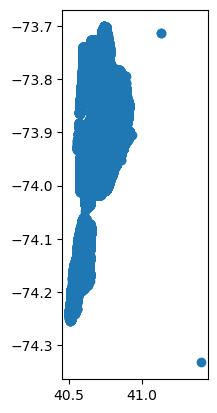

In [53]:
collisions.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

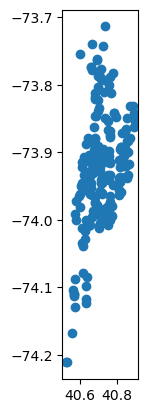

In [54]:
sampled_collisions = collisions.sample(n=200, random_state=8)
sampled_collisions.plot()
plt.show

In [55]:
sampled_collisions['geometry'] = sampled_collisions.apply(
    lambda x: Point((x['LONGITUDE'], x['LATITUDE'])), axis=1
)

In [56]:
sampled_collisions

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
1533738,06/29/2014,13:00,STATEN ISLAND,10306,40.567629,-74.112611,"(40.5676287, -74.1126115)",HYLAN BOULEVARD,BEACH AVENUE,0,...,0,0,0,987829,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0,POINT (-74.11261 40.56763)
987078,11/21/2016,7:00,QUEENS,11369.0,40.763344,-73.877310,"(40.763344, -73.87731)",92 STREET,ASTORIA BOULEVARD,0,...,0,0,0,3567113,Sedan,Sedan,0,0,0,POINT (-73.87731 40.76334)
456760,03/17/2019,12:00,BRONX,10475.0,40.868790,-73.831680,"(40.86879, -73.83168)",BARTOW AVENUE,BAYCHESTER AVENUE,0,...,0,0,0,4110636,Sedan,0,0,0,0,POINT (-73.83168 40.86879)
1863450,11/03/2012,11:30,MANHATTAN,10018,40.756527,-73.994019,"(40.7565272, -73.994019)",WEST 39 STREET,9 AVENUE,0,...,0,0,0,27240,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,0,0,0,POINT (-73.99402 40.75653)
1188439,12/28/2015,20:15,BRONX,10453.0,40.849804,-73.920320,"(40.849804, -73.9203203)",POPHAM AVENUE,WEST 176 STREET,0,...,0,0,0,3361858,SPORT UTILITY / STATION WAGON,UNKNOWN,0,0,0,POINT (-73.92032 40.84980)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435684,12/05/2014,15:40,QUEENS,11412,40.693268,-73.763772,"(40.693268, -73.7637721)",MEXICO STREET,TURIN DRIVE,0,...,0,0,0,3131409,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0,POINT (-73.76377 40.69327)
1334154,06/04/2015,7:40,BROOKLYN,11234.0,40.613298,-73.922375,"(40.6132982, -73.9223747)",AVENUE S,EAST 54 STREET,0,...,0,0,0,3234313,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,0,0,0,POINT (-73.92237 40.61330)
1366130,03/26/2015,15:10,MANHATTAN,10128.0,40.777554,-73.948880,"(40.7775544, -73.9488804)",1 AVENUE,EAST 87 STREET,0,...,0,0,0,3192931,LIVERY VEHICLE,TAXI,0,0,0,POINT (-73.94888 40.77755)
1662935,10/10/2013,19:07,MANHATTAN,10036,40.762582,-74.000386,"(40.7625822, -74.0003863)",WEST SIDE HIGHWAY,WEST 43 STREET,0,...,0,0,0,43068,LIVERY VEHICLE,PASSENGER VEHICLE,0,0,0,POINT (-74.00039 40.76258)


In [57]:
my_map = folium.Map(
    location=[40.7,-74],
    zoom_start=9,
    tiles='Stamen Terrain'
)

basemaps = {
    'Google Maps' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Satellite' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Terrain' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Satellite Hybrid' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Esri Satellite' : folium.TileLayer(
        tiles= 'https://server.arcgisionline.com/ArcGIS/reset/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    )
}

basemaps['Google Satellite Hybrid'].add_to(my_map)
folium.GeoJson(sampled_collisions).add_to(my_map)
plugins.Fullscreen().add_to(my_map)
my_map

### Numero de personas afectadas y causas de accidentes

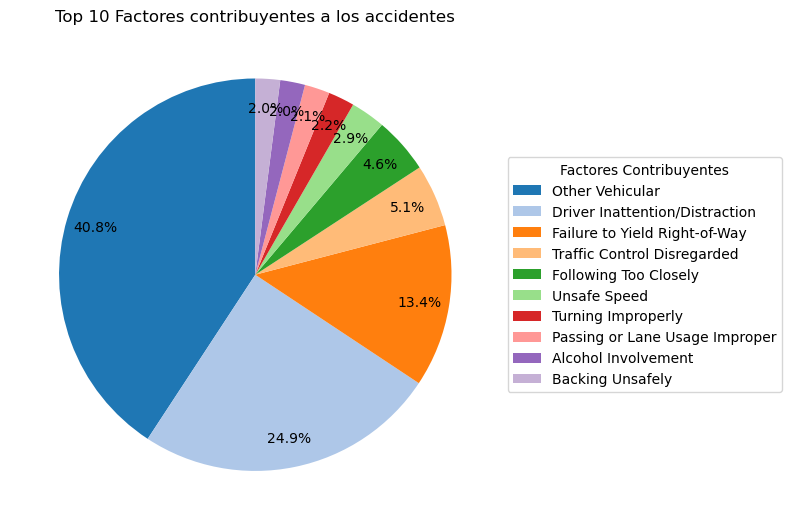

In [58]:
df['NUMBER OF PERSONS INJURED'] = pd.to_numeric(df['NUMBER OF PERSONS INJURED'], errors='coerce')
df = df.dropna(subset=['NUMBER OF PERSONS INJURED'])

df_grouped_pie = df.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS INJURED'].sum().nlargest(10)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(df_grouped_pie, autopct='%1.1f%%', startangle=90, 
                                   pctdistance=0.85, colors=plt.cm.tab20.colors)

plt.legend(wedges, df_grouped_pie.index, title="Factores Contribuyentes", loc="center left", 
           bbox_to_anchor=(1, 0.5), fontsize=10)

plt.title('Top 10 Factores contribuyentes a los accidentes')
plt.tight_layout()

plt.show()

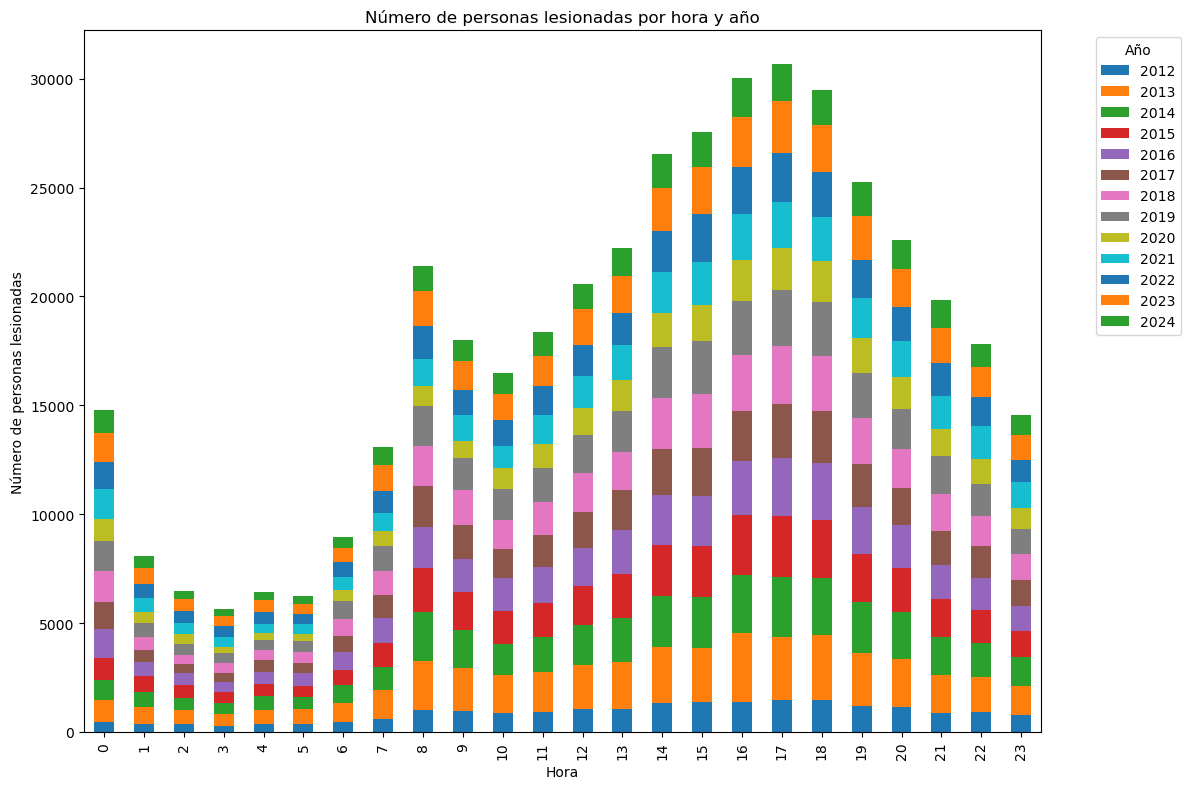

In [59]:
df = df.dropna(subset=['CRASH DATE', 'CRASH TIME', 'NUMBER OF PERSONS INJURED'])
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y', errors='coerce')
df['YEAR'] = df['CRASH DATE'].dt.year
df['HOUR'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour

df_grouped = df.groupby(['HOUR', 'YEAR'])['NUMBER OF PERSONS INJURED'].sum().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Número de personas lesionadas por hora y año')
plt.xlabel('Hora')
plt.ylabel('Número de personas lesionadas')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

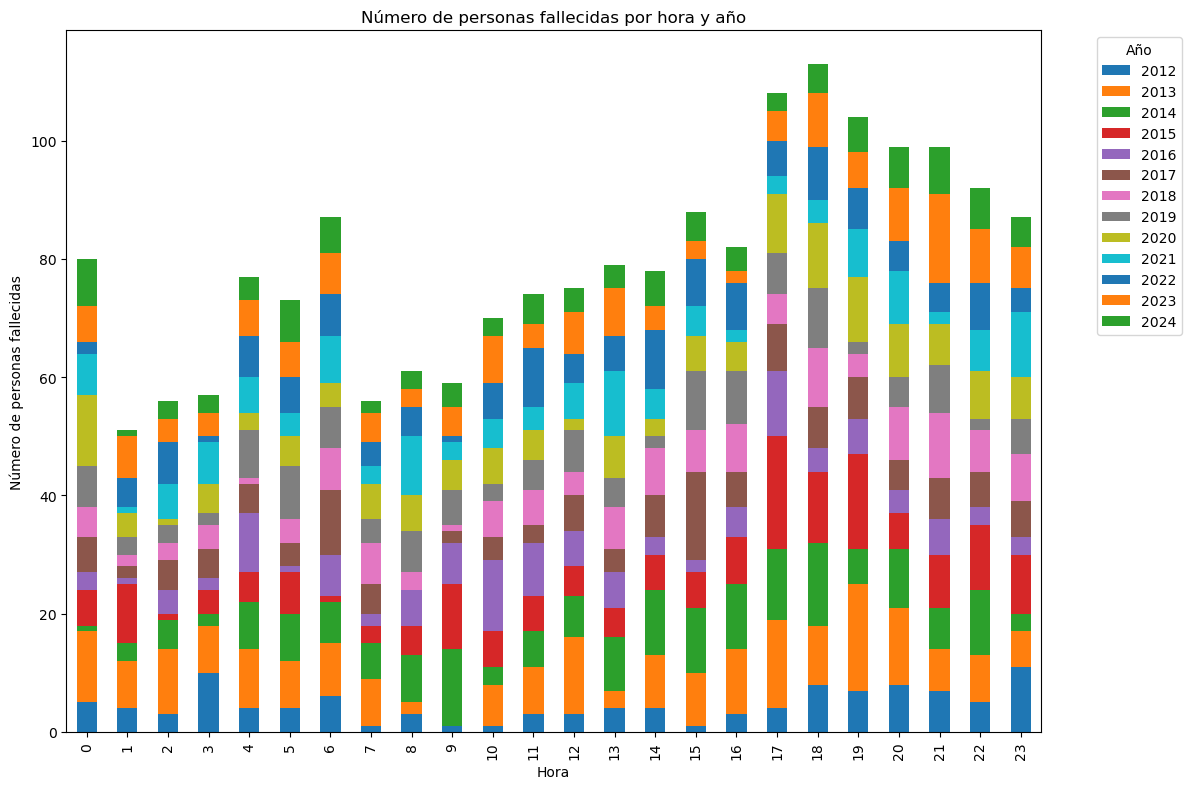

In [60]:
df['NUMBER OF PERSONS KILLED'] = pd.to_numeric(df['NUMBER OF PERSONS KILLED'], errors='coerce')
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].fillna(0)

df_grouped = df.groupby(['HOUR', 'YEAR'])['NUMBER OF PERSONS KILLED'].sum().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Número de personas fallecidas por hora y año')
plt.xlabel('Hora')
plt.ylabel('Número de personas fallecidas')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()